In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#add scripts to path
import sys
sys.path.append('../scripts')


from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd
import MeshUtils as mutil
import gmsh
import GenerateGraph as gg
import os
import json

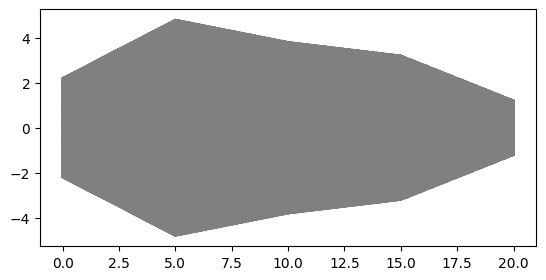

In [13]:
# run this cell to load a mesh and plot it

mesh_load = mutil.MeshLoader("../data/mesh_test/test_mesh_0")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face
mesh_load.plot_mesh()

In [14]:
ngraphs = 1 # number of graphs to generate
output_dir = "../data/graphs_test/" # output directory for graphs 
mesh_dir = "../data/mesh_test/" # directory for mesh files
mesh_info = json.load(open(mesh_dir + '/mesh_info.json'))
mesh_name = mesh_info['mesh_name']
nmesh = mesh_info['nmesh']
nodes = mesh_info['nodes']

f = Constant(0.0)
g = Expression('a*exp(-(t-b)*(t-b)/c/c)',degree=2,a=5,b=2.5,c=1,t=0)
u0 = Expression('0.0',degree=0)
T = 5
timesteps = 50
dt = T/timesteps
kmax = 100 # maximum thermal conductivity
kmin = 1   # minimum thermal conductivity

for i in range(ngraphs):
    imesh = np.random.randint(0,nmesh)
    mesh_load = mutil.MeshLoader(mesh_dir + mesh_name + f"_{imesh}")
    mesh = mesh_load.mesh
    bounds = mesh_load.bounds
    face = mesh_load.face
    mesh_load.update_tags(nodes=nodes)
    mesh_load.measure_definition()
    
    V = FunctionSpace(mesh_load.mesh,"DG",1)
    set_log_active(False)
    k = round(np.random.uniform(kmin, kmax),2)
    heat_gaussian = gd.Heat(mesh_load,V,k,f,u0,dt,T,g)
    heat_gaussian.solve()
    data = gd.DataHeat(heat_gaussian,mesh_load)
    data.save_graph(output_dir)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
[{0.0: array([0., 0., 0., 0., 0.]), 0.1: array([0.03391438, 0.0085604 , 0.00173739, 0.00032173, 0.        ]), 0.2: array([0.0555243 , 0.01977695, 0.00525957, 0.00117392, 0.        ]), 0.30000000000000004: array([0.08887863, 0.03505988, 0.01072385, 0.00268449, 0.        ]), 0.4: array([0.13941482, 0.05735594, 0.01885903, 0.00504989, 0.        ]), 0.5: array([0.21434269, 0.09030631, 0.03091644, 0.0086129 , 0.        ]), 0.6000000000000001: array([0.32300959, 0.13850741, 0.04866187, 0.01389543, 0.        ]), 0.7000000000000001: array([0.47712757, 0.20777668, 0.07443533, 0.02162343, 0.        ]), 0.8: array([0.69082468, 0.30531591, 0.11122904, 0.03275414, 0.        